In [1]:
# --- Import Libraries ---
import magpylib as magpy
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

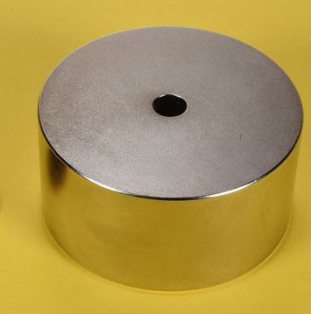
- Dimensions: 2" od x 1/4" id x 1" thick
- Tolerances: ±0.004" x ±0.004" x ±0.004"
- Material: NdFeB, Grade N42
- Plating/Coating: Ni-Cu-Ni (Nickel)
- Magnetization Direction: Axial (Poles on Flat Ends)
- Weight: 13.4 oz. (380 g)
- Pull Force, Case 1: 205.3 lbs
- Pull Force, Case 2: 205.3 lbs
- Max Operating Temp: 176ºF (80ºC)
- Brmax: 13,200 Gauss
- BHmax: 42 MGOe

In [2]:
# --- Magnet Specifications ---
OD = 2 * 0.0254             # Outer diameter (meters)
ID = 0.25 * 0.0254          # Inner diameter (meters)
THICKNESS = 1 * 0.0254      # Thickness (meters)

TOLERANCE = 0.004 * 0.0254 # Tolerance (meters)

BR = 1.32                   #  Remanence (Tesla) (13,200 Gauss converted to Tesla)
MU0 = 4*np.pi*1e-7          # Vacuum Permeability
M = BR/MU0                  # Magnetization in A/m

separation = 0.015  # meters

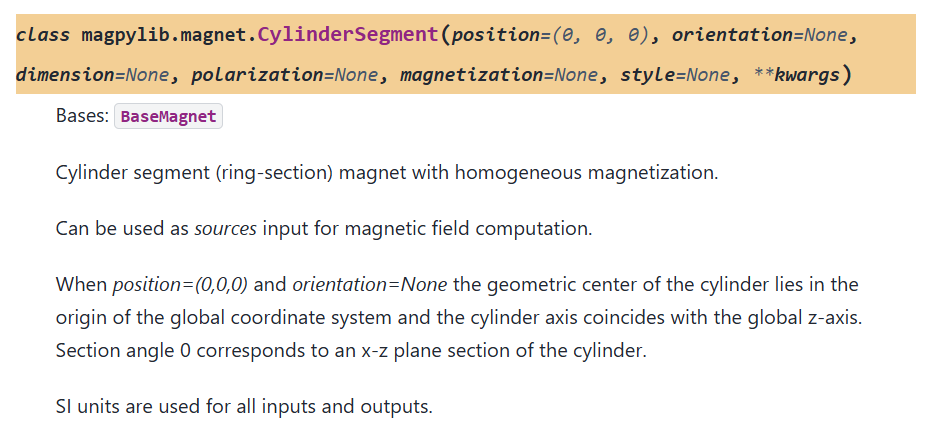
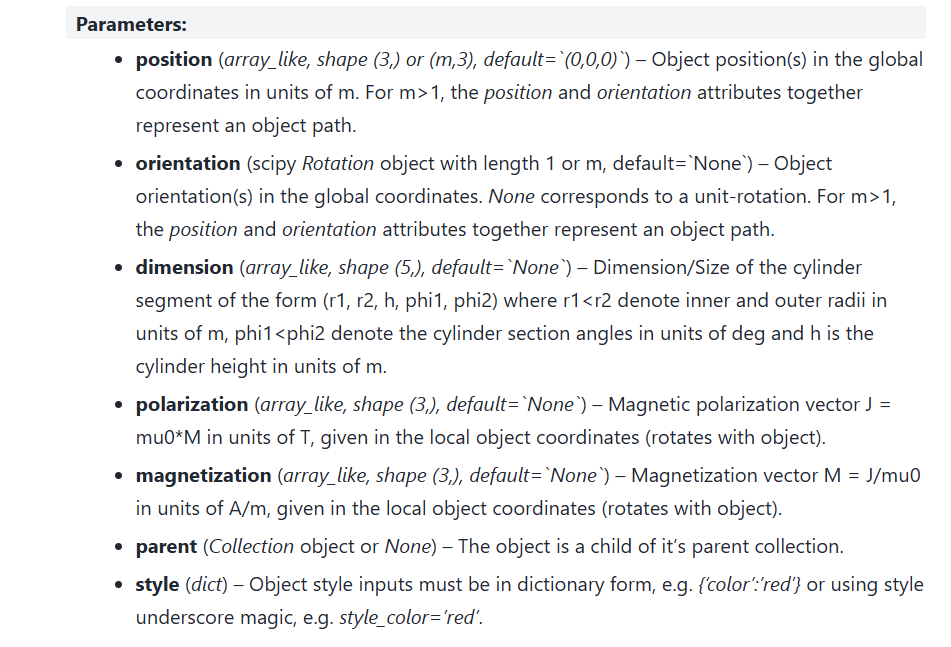
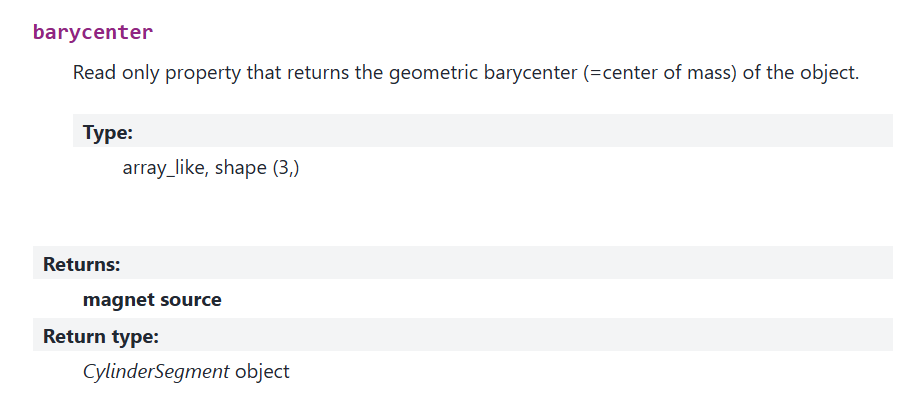
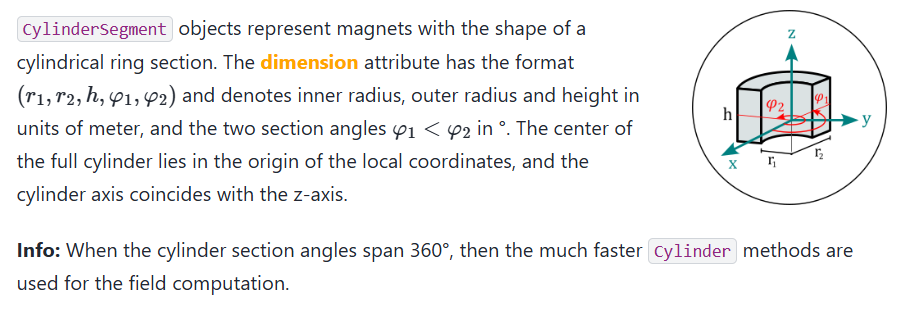

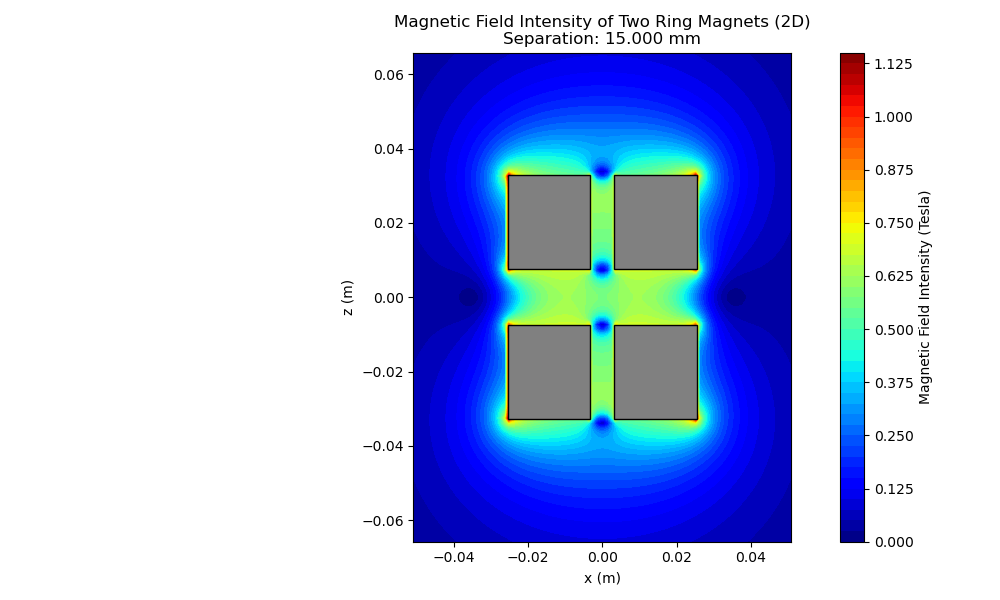

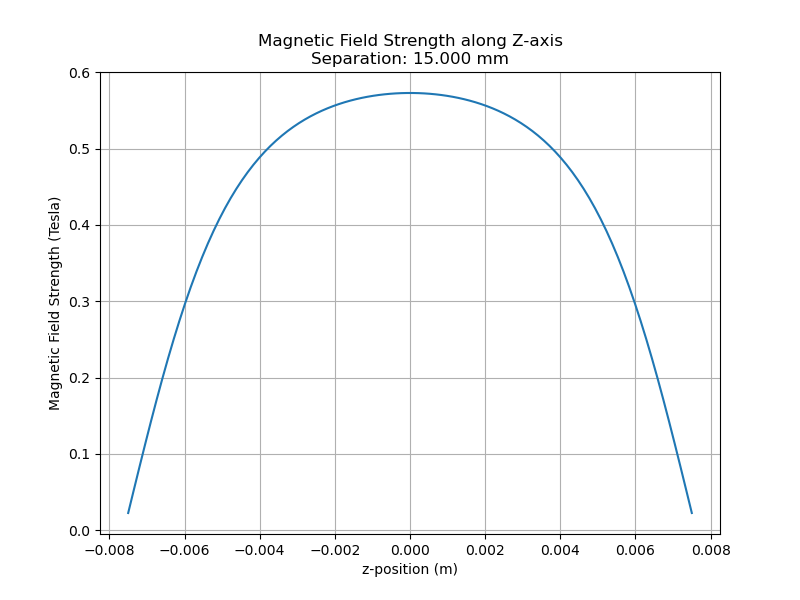

In [3]:
# --- Create the Ring Magnets ---
ring_magnet1 = magpy.magnet.CylinderSegment(position=(0, 0, -separation/2 - THICKNESS/2), dimension=(ID/2,OD/2,THICKNESS,0,360), magnetization=(0, 0, M))
ring_magnet2 = magpy.magnet.CylinderSegment(position=(0, 0, +separation/2 + THICKNESS/2), dimension=(ID/2,OD/2,THICKNESS,0,360), magnetization=(0, 0, M))

# Combine the magnets into a single collection
magnet_system = magpy.Collection(ring_magnet1, ring_magnet2)

separation = 0.015  # meters

# --- Define Observation Points for 2D Plot ---
x = np.linspace(-OD, OD, 100)  # Wider range to include both magnets
z = np.linspace(-(separation + 2*THICKNESS), (separation + 2*THICKNESS), 100)
x, z = np.meshgrid(x, z)
y = np.zeros_like(x)

obs_pos = np.stack((x, y, z), axis=-1)
obs_pos = obs_pos.reshape(-1, 3)

# --- Calculate the Magnetic Field ---
B = magnet_system.getB(obs_pos)

# Calculate the magnitude of the magnetic field at each point
B_magnitude = np.linalg.norm(B, axis=1)
B_magnitude = B_magnitude.reshape(x.shape)

# --- Plot the Magnetic Field Intensity (Contour Plot) ---
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
contour = plt.contourf(x, z, B_magnitude, levels=50, cmap='jet')
plt.colorbar(contour, label='Magnetic Field Intensity (Tesla)')

# Add magnet geometry (approximate)
# Magnet 1
rect_outer_left1 = plt.Rectangle((-OD/2, -(separation + THICKNESS)/2 - THICKNESS/2), OD/2-ID/2, THICKNESS, linewidth=1, edgecolor='k', facecolor='gray')
rect_outer_right1 = plt.Rectangle((ID/2, -(separation + THICKNESS)/2 - THICKNESS/2), OD/2-ID/2, THICKNESS, linewidth=1, edgecolor='k', facecolor='gray')
plt.gca().add_patch(rect_outer_left1)
plt.gca().add_patch(rect_outer_right1)

# Magnet 2
rect_outer_left2 = plt.Rectangle((-OD/2, (separation + THICKNESS)/2 - THICKNESS/2), OD/2-ID/2, THICKNESS, linewidth=1, edgecolor='k', facecolor='gray')
rect_outer_right2 = plt.Rectangle((ID/2, (separation + THICKNESS)/2 - THICKNESS/2), OD/2-ID/2, THICKNESS, linewidth=1, edgecolor='k', facecolor='gray')
plt.gca().add_patch(rect_outer_left2)
plt.gca().add_patch(rect_outer_right2)


plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.title('Magnetic Field Intensity of Two Ring Magnets (2D)\nSeparation: {:.3f} mm'.format(separation*1000))
plt.xlim(-OD, OD)
plt.ylim(-(separation + 2*THICKNESS), (separation + 2*THICKNESS))
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.savefig('2D_magnetic_field_intensity_separation_{}mm.png'.format(int(separation*1000)), dpi=300)
plt.show()


# --- Define Observation Points along Z-axis ---
z_positions = np.linspace(-separation/2, separation/2, 100)  # Points between magnets
obs_pos_z = np.array([(0, 0, z) for z in z_positions])

# --- Calculate Magnetic Field along Z-axis ---
B_z = magnet_system.getB(obs_pos_z)
B_magnitude_z = np.linalg.norm(B_z, axis=1)  # Magnitude of B along z-axis

# --- Plot Magnetic Field Strength along Z-axis ---
plt.figure(figsize=(8, 6))
plt.plot(z_positions, B_magnitude_z)
plt.xlabel('z-position (m)')
plt.ylabel('Magnetic Field Strength (Tesla)')
plt.title('Magnetic Field Strength along Z-axis\nSeparation: {:.3f} mm'.format(separation*1000))
plt.grid(True)
plt.show()

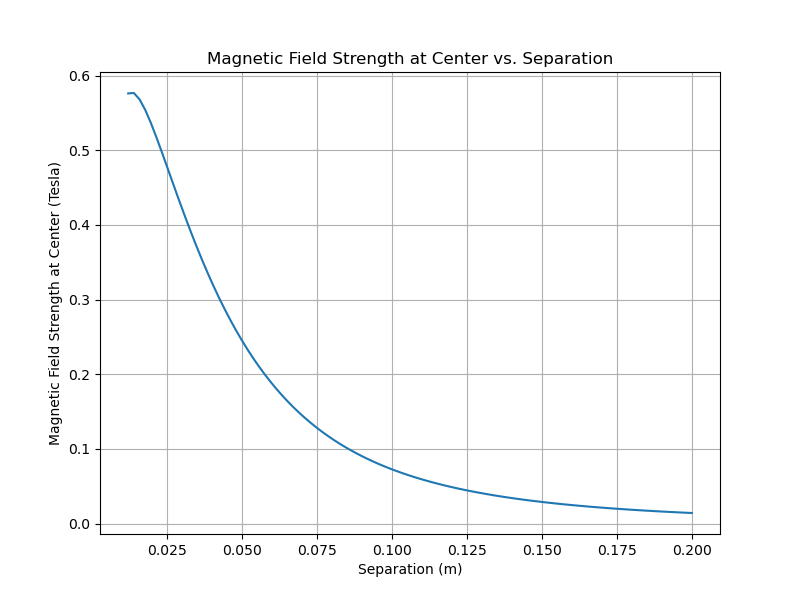

In [6]:
# --- Separation Range ---
separations = np.linspace(0.012, 0.20, 100)  # Separations from 1.2cm to 20cm (0.1 to 0.2m)

# --- Store Magnetic Field Strengths ---
field_strengths = []

# --- Loop Through Separations ---
for separation in separations:
    # --- Create the Ring Magnets ---
    # Magnet 1 and 2
    ring_magnet1 = magpy.magnet.CylinderSegment(position=(0, 0, -separation/2 - THICKNESS/2), dimension=(ID/2,OD/2,THICKNESS,0,360), magnetization=(0, 0, M))
    ring_magnet2 = magpy.magnet.CylinderSegment(position=(0, 0, +separation/2 + THICKNESS/2), dimension=(ID/2,OD/2,THICKNESS,0,360), magnetization=(0, 0, M))

    # Combine the magnets into a single collection
    magnet_system = magpy.Collection(ring_magnet1, ring_magnet2)

    # --- Calculate Magnetic Field at Center ---
    center_position = np.array([(0, 0, 0)])  # Center point (0,0,0)
    B_center = magnet_system.getB(center_position)
    B_magnitude_center = np.linalg.norm(B_center)  # Magnitude at center

    field_strengths.append(B_magnitude_center)

# --- Plot Field Strength vs. Separation ---
plt.figure(figsize=(8, 6))
plt.plot(separations, field_strengths)
plt.xlabel('Separation (m)')
plt.ylabel('Magnetic Field Strength at Center (Tesla)')
plt.title('Magnetic Field Strength at Center vs. Separation')
plt.grid(True)
plt.savefig('field_strength_vs_separation_at_center.png', dpi=300)
plt.show()